In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
data=pd.read_csv('sigma_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.38501899848088256
           A         B         C        D
0   0.000065  0.003707  45.48131  0.00300
1   0.003847  0.253235  44.56355  0.01184
2   0.000019  0.003634  44.48522  0.01201
3   0.000015  0.012098  44.94271  0.00330
4   0.000020  0.006184  44.85158  0.01119
..       ...       ...       ...      ...
66  0.000131  0.234077  44.73836  0.01216
67  0.000145  0.017397  44.70017  0.01567
68  0.000138  0.342242  44.99169  0.00923
69  0.000846  0.275069  45.37277  0.00411
70  0.000133  0.105474  44.99354  0.00965

[70 rows x 4 columns]


pendiente b1  0.0015305814074446221
intercepción b0 is -0.06717354921879107


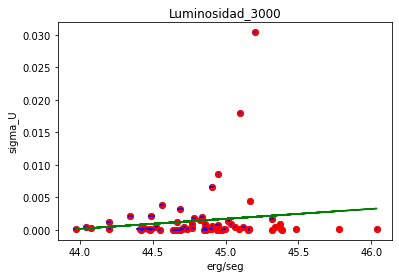

In [3]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_U')
plt.savefig("Luminosidad_3000_sigma_U.pdf")

In [4]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.00153058]
 [0.02880673]
 [1.        ]]
Intercepción: [-0.06717355 -1.06992933  0.        ]
Errorcuadratico medio : 0.016827304078541945
Raiz del error cuadratico medio:  0.12972009897676592
 Coeficiente de determinacion R2 :  0.3403085087669349


In [5]:
data=pd.read_csv('sigma_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.37075949965628807
           A         B         C        D
0   0.020374  0.217542  45.48131  0.00300
1   0.019147  0.245628  44.56355  0.01184
2   0.000347  0.007313  44.48522  0.01201
3   0.000015  0.018346  44.94271  0.00330
4   0.204625  0.424457  44.85158  0.01119
..       ...       ...       ...      ...
86  0.025006  0.768520  45.73744  0.00214
87  0.000612  0.021187  44.28572  0.01334
88  0.000019  0.024731  44.39641  0.01567
89  0.000459  0.110793  44.43794  0.01206
90  0.000051  0.045892  44.40271  0.01366

[90 rows x 4 columns]


pendiente b1  0.001920938833069918
intercepción b0 is -0.0755535004113122


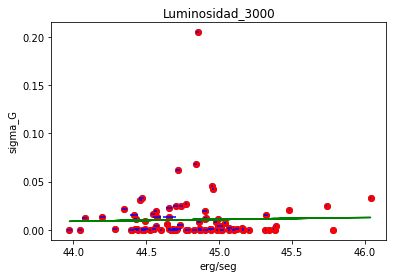

In [6]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_G')
plt.savefig("Luminosidad_3000_sigma_G.pdf")

In [7]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[ 0.00192094]
 [-1.15900089]
 [ 1.        ]]
Intercepción: [-7.55535004e-02  5.27155360e+01  2.13162821e-14]
Errorcuadratico medio : 10.090309521563077
Raiz del error cuadratico medio:  3.1765247553833227
 Coeficiente de determinacion R2 :  0.33560896306515886


In [8]:
data=pd.read_csv('sigma_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]


print(stats.stdev(x))
print(data)

0.36089656603926096
           A         B         C        D
0   0.000240  0.049229  45.48131  0.00300
1   0.009937  0.466189  44.56355  0.01184
2   0.000010  0.002430  44.48522  0.01201
3   0.000006  0.013842  44.94271  0.00330
4   0.000146  0.074123  44.85158  0.01119
..       ...       ...       ...      ...
79  0.019907  0.916165  44.98618  0.00803
80  0.000153  0.003682  45.06799  0.01807
81  0.000023  0.027434  44.86777  0.01203
82  0.008490  0.386608  44.71317  0.02774
83  0.000332  0.204663  44.93590  0.01085

[83 rows x 4 columns]


pendiente b1  -0.006217936417004411
intercepción b0 is 0.28341304554927343


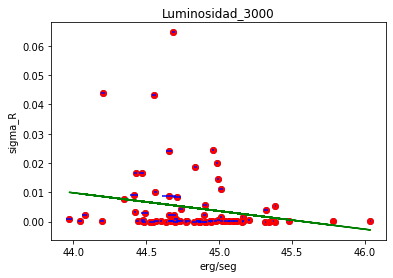

In [9]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_R')
plt.savefig("Luminosidad_3000_sigma_R.pdf")

In [10]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.00621794]
 [-0.10412062]
 [ 1.        ]]
Intercepción: [ 2.83413046e-01  4.80938434e+00 -7.10542736e-15]
Errorcuadratico medio : 0.010555150988456963
Raiz del error cuadratico medio:  0.10273826448046007
 Coeficiente de determinacion R2 :  0.36191603542011624


In [11]:
data=pd.read_csv('sigma_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.36263328963963537
               A         B         C        D
0   2.069541e-02  0.179094  45.48131  0.00300
1   1.134060e-02  0.277104  44.56355  0.01184
2   4.675283e-05  0.006660  44.48522  0.01201
3   3.306489e-05  0.020402  44.94271  0.00330
4   3.935957e-30  0.210971  44.85158  0.01119
..           ...       ...       ...      ...
78  3.360624e-04  0.207577  44.55196  0.01556
79  2.722921e-04  0.100483  44.98618  0.00803
80  1.984484e-02  0.286695  45.06799  0.01807
81  6.485403e-03  0.384575  44.86777  0.01203
82  1.450876e-02  0.169201  44.71317  0.02774

[83 rows x 4 columns]


pendiente b1  0.2515912454077905
intercepción b0 is -11.204249255462047


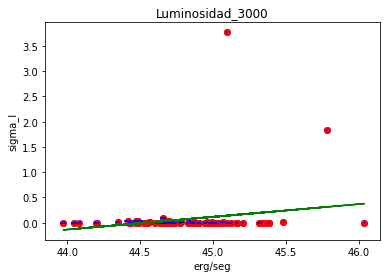

In [12]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_I')
plt.savefig("Luminosidad_3000_sigma_I.pdf")

In [13]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[ 0.25159125]
 [35.1968652 ]
 [ 1.        ]]
Intercepción: [-1.12042493e+01 -1.56069366e+03 -7.10542736e-15]
Errorcuadratico medio : 7669.712647651534
Raiz del error cuadratico medio:  87.57689562693767
 Coeficiente de determinacion R2 :  0.34893609248261725


In [14]:
data=pd.read_csv('sigma_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.36807619926271606
               A         B         C        D
0   8.498908e-05  0.083304  45.48131  0.00300
1   5.154518e-05  0.066665  44.56355  0.01184
2   6.020869e-05  0.183441  44.48522  0.01201
3   6.605876e-08  0.053880  44.94271  0.00330
4   1.904890e-05  0.206973  44.85158  0.01119
..           ...       ...       ...      ...
74  2.665199e-05  0.178663  44.59963  0.00717
75  5.922381e-06  0.003829  44.73006  0.02122
76  1.903299e-05  0.061661  44.47789  0.01137
77  4.234013e-05  0.249341  45.01247  0.01123
78  1.725943e-07  0.440361  44.55196  0.01556

[78 rows x 4 columns]


slope b1 is -0.0015423788463672697
intercept b0 is 0.07081840142919313
squared error is 0.013565381752329636
mean squared error is 0.00017391515067089277
root mean square error is 0.01318768936057006
R square is 0.0018260913986670735


<function matplotlib.pyplot.show(close=None, block=None)>

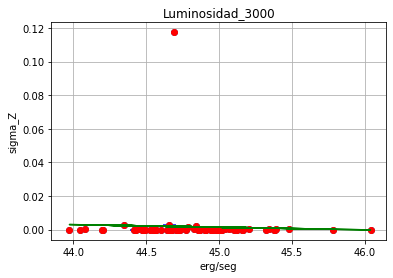

pendiente b1  -0.0015423788463672697
intercepción b0 is 0.07081840142919313


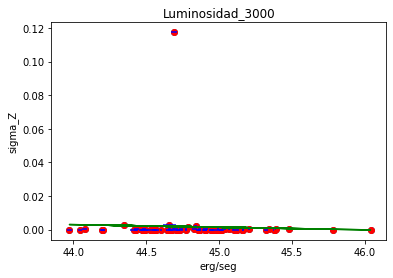

In [15]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_Z')
plt.savefig("Luminosidad_3000_sigma_Z.pdf")

In [16]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-1.54237885e-03]
 [-1.92813301e+01]
 [ 1.00000000e+00]]
Intercepción: [7.08184014e-02 8.83688279e+02 0.00000000e+00]
Errorcuadratico medio : 9439.416309528586
Raiz del error cuadratico medio:  97.1566585959428
 Coeficiente de determinacion R2 :  0.3345262768803173
